In [196]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [197]:
clicksort = np.random.random(1000) 
clicks = clicksort > 0.3
n_click = sum(clicks)
print(f'Number of clicks = {n_click}')
print(f'Proportion who clicked {n_click / len(clicksort)}')

Number of clicks = 714
Proportion who clicked 0.714


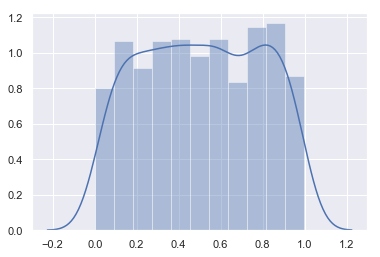

In [198]:
sns.distplot(clicksort )

In [199]:
finches_raw = pd.read_csv(r'Desktop/finches2.csv', encoding = 'utf8', engine = 'python')

In [200]:
finches = finches_raw.dropna()

In [201]:
finches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 4 columns):
band       248 non-null object
species    248 non-null object
blength    248 non-null float64
bdepth     248 non-null object
dtypes: float64(1), object(3)
memory usage: 9.7+ KB


In [202]:
# proportion of birds with beak over 1-0 
over_10 = sum(finches.blength > 10) / len(finches.blength)
over_10 # proportion not a probability

0.8508064516129032

In [203]:
# creating a simulation to estimate a population proportion to use as a proxy 
n_samples = 10_000
(sum(np.random.choice(finches.blength, n_samples, replace = True) > 10)) / n_samples

0.8534

In [204]:
# Estimate the probability  of 5 or more heads after p = 0.3
heads_thirty = sum(np.random.binomial(5, 0.3, 20_000) >= 5) / 20_000
heads_thirty

0.00185

In [205]:
# Estimate probability of 5 or more heads when p = 0.5
fair_heads = sum(np.random.binomial(20, 0.5, 2000) >= 5) / 2000
fair_heads

0.995

(array([0.002 , 0.009 , 0.0485, 0.1155, 0.202 , 0.255 , 0.2075, 0.1075,
        0.0415, 0.0115]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

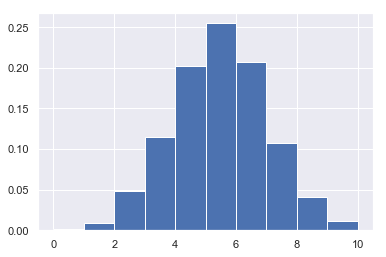

In [206]:
plt.hist(np.random.binomial(10, 0.5, 2000), density = True)

In [207]:
# P(A) * P(B); estimate probability of having two birds with > 10 
p_finch = sum(finches.blength > 10) / len(finches.blength)
p_finch

0.8508064516129032

In [208]:
# what if we know the finch is of 'fortis'
df_fortis = finches.loc[finches['species'] == 'fortis']
conditional_fortis = (sum(df_fortis.blength > 10) / len(df_fortis))
conditional_fortis


0.6942148760330579

In [209]:
# what if we know the finch is of 'scandens'
conditional_scandens = (sum(finches.blength.loc[finches['species'] == 'scandens'] > 10) / len(finches.loc[finches['species'] == 'scandens']))
conditional_scandens

1.0

In [210]:
np.random.seed(13)
# Take 10_000 samples
n = 10_000
# Sample the number of users 
users = np.random.binomial(10_000, 0.005)
non_users = n - users
users, non_users

(58, 9942)

In [211]:
# How many users tested positive
positive_users = np.random.binomial(users, .99)
positive_users
# 56

57

In [212]:
# How many non users tested positive
false_positive_users = np.random.binomial(non_users, 0.01)
false_positive_users
# 86

117

In [213]:
# How many of those positive tests were for users?
users / (false_positive_users + positive_users)



0.3333333333333333

In [214]:
from ipywidgets import interact
import pymc3 as pm

In [215]:
def plot_posterior(p = 0.6, N= 0):
    # coin flip bayesian part scipy 2018 
    np.random.seed(42)
    n_successes = np.random.binomial(N, p)
    # x axis for PDF
    x = np.linspace(0,1,10000)
    # prior
    prior = 1
    # compute posterior, given the likelihood (analytic form)
    posterior = ((x**n_successes) * (1 - x)**(N - n_successes)) * prior
    # so that it always peaks at 1
    posterior /=np.max(posterior)
    plt.plot(x, posterior)
    plt.show()

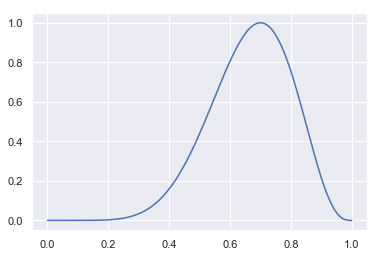

In [216]:
plot_posterior(0.6, 10)

In [217]:
interact(plot_posterior, p = (0,1, 0.01), N=(0,1000));

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.01), IntSlider(value=0, descript…

In [218]:
def plot_posteriors(p = 0.6, N= 0):
    # coin flip bayesian part scipy 2018 
    np.random.seed(42)
    n_successes = np.random.binomial(N, p)
    # x axis for PDF
    x = np.linspace(0.01,0.99,100)
    # compute posterior, given the likelihood (analytic form)
    posterior1 = ((x**n_successes) * (1 - x)**(N - n_successes)) 
    # so that it always peaks at 1
    posterior1 /=np.max(posterior1)
    plt.plot(x, posterior1, label = 'Uniform prior')
    jeffreys_prior = np.sqrt((x * (1 - x)**(-1)))
    posterior2 = posterior1 * jeffreys_prior
    posterior2 /=np.max(posterior2)
    plt.plot(x, posterior2, label = 'Jeffreys_prior')
    plt.legend()
    plt.show()

In [219]:
interact(plot_posteriors, p = (0,1, 0.01), N=(0,1000));

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.01), IntSlider(value=0, descript…

In [220]:
# click through rates 
p_a = 0.15
N = 150
n_successes_a = np.random.binomial(N, p_a)

In [221]:
n_successes_a / N

0.2

In [222]:
# 1. build the model
with pm.Model() as model:
    # Prior on p
    prob = pm.Uniform('p')
    # binomial likelihood
    pm.Binomial('y', n = N, p = prob, observed = n_successes_a)

In [223]:
# sample from the posterior
with model:
    samples = pm.sample(2000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


RuntimeError: The communication pipe between the main process and its spawned children is broken.
In Windows OS, this usually means that the child process raised an exception while it was being spawned, before it was setup to communicate to the main process.
The exceptions raised by the child process while spawning cannot be caught or handled from the main process, and when running from an IPython or jupyter notebook interactive kernel, the child's exception and traceback appears to be lost.
A known way to see the child's error, and try to fix or handle it, is to run the problematic code as a batch script from a system's Command Prompt. The child's exception will be printed to the Command Promt's stderr, and it should be visible above this error and traceback.
Note that if running a jupyter notebook that was invoked from a Command Prompt, the child's exception should have been printed to the Command Prompt on which the notebook is running.

In [ ]:
pm.plot_posterior(samples);

In [ ]:
df_fortis = finches.loc[finches['species'] == 'fortis']
df_scandens = finches.loc[finches['species'] == 'scandens']


In [193]:
with pm.Model() as birds:
    mu_1 = pm.Normal('mu_1', mu = 10, sigma = 5)
    sigmas_1 = pm.Uniform('sigma_1', 0, 10)
    # Gaussian likelyhood
    y_1 = pm.Normal('mu1', mu = mu_1, sigma = sigmas_1, observed = df_fortis.blength)

In [194]:
with birds:
    samples = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_1, mu_1]
Sampling 4 chains: 100%|████████████████████████████████████████████████████████| 6000/6000 [05:33<00:00,  7.37draws/s]


In [ ]:
pm.plot_posterior(samples);